In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

Importing the dataset

In [23]:
df = pd.read_csv("mcdonalds.csv")

# Exploring the dataset

In [24]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [25]:
df.shape

(1453, 15)

Let's identify the numerical and categorical variables

In [26]:
df.select_dtypes(include=np.number)
df.select_dtypes(include=np.number).columns.tolist()

['Age']

In [27]:
string=['object']
df.select_dtypes(include=string)
df.select_dtypes(include=string).columns.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'VisitFrequency',
 'Gender']

Checking null values:

In [28]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

Removing the variables that are not necessary for our analysis:

In [29]:
df = df.drop(['Age', 'Like', 'VisitFrequency', 'Gender'], axis=1)

<AxesSubplot:xlabel='yummy', ylabel='count'>

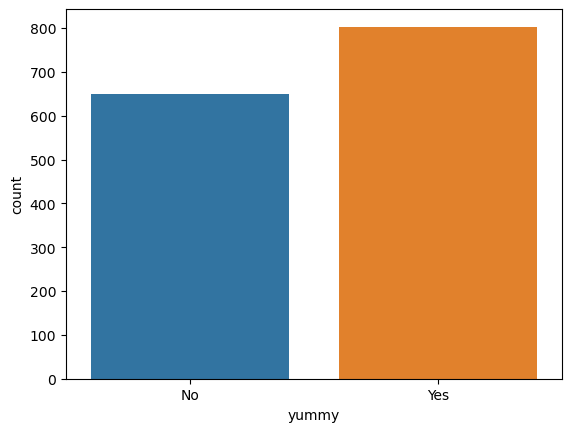

In [30]:
sns.countplot(x = 'yummy' , data =df)

<AxesSubplot:xlabel='convenient', ylabel='count'>

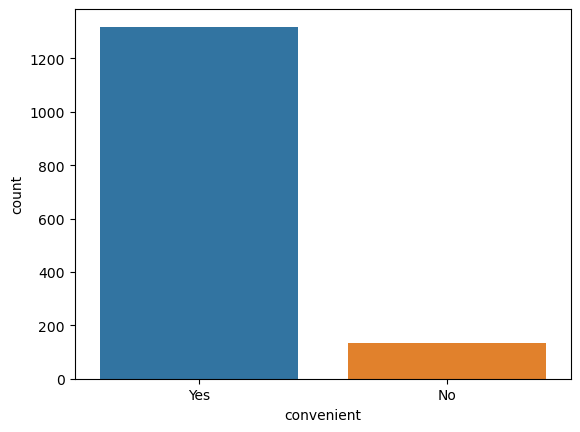

In [31]:
sns.countplot(x = 'convenient' , data =df)

<AxesSubplot:xlabel='spicy', ylabel='count'>

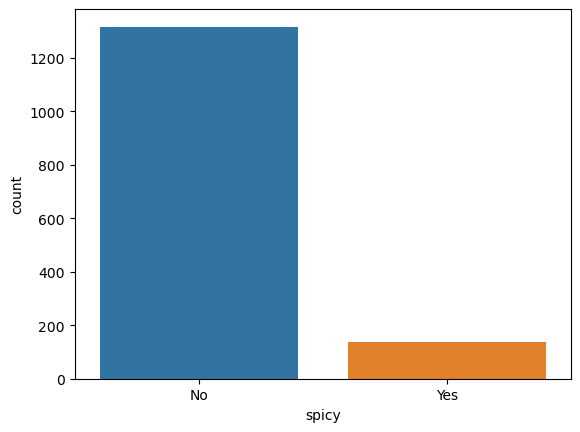

In [32]:
sns.countplot(x = 'spicy' , data =df)

<AxesSubplot:xlabel='fattening', ylabel='count'>

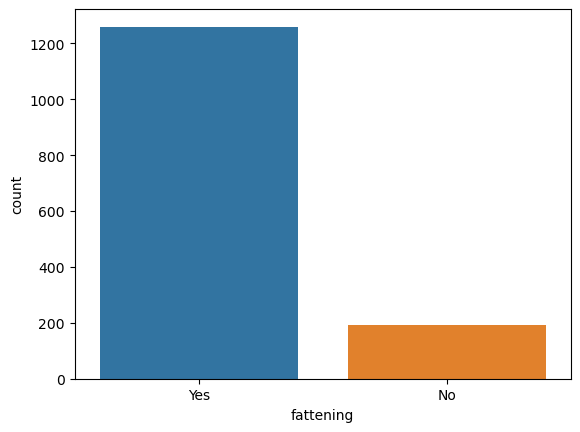

In [33]:
sns.countplot(x = 'fattening' , data =df)

<AxesSubplot:xlabel='greasy', ylabel='count'>

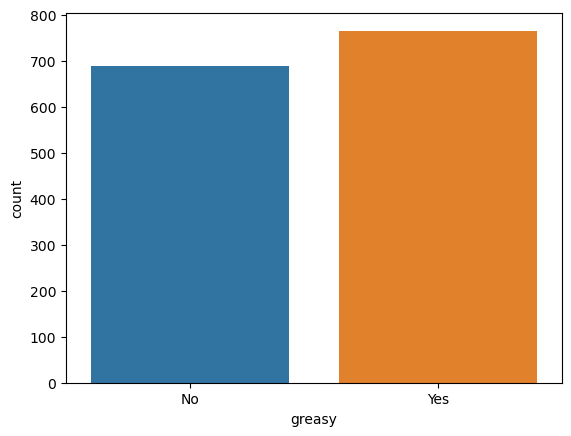

In [34]:
sns.countplot(x = 'greasy', data =df)

<AxesSubplot:xlabel='fast', ylabel='count'>

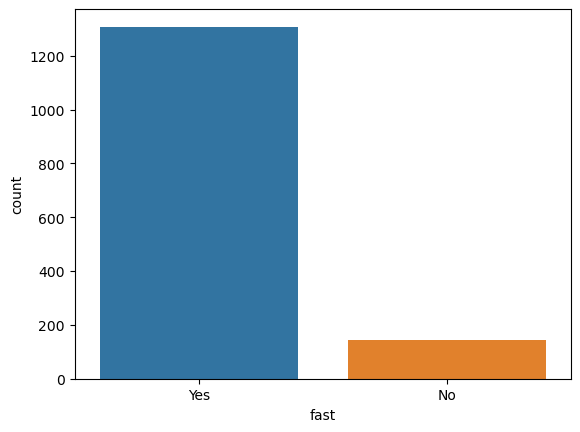

In [35]:
sns.countplot(x = 'fast', data =df)

<AxesSubplot:xlabel='cheap', ylabel='count'>

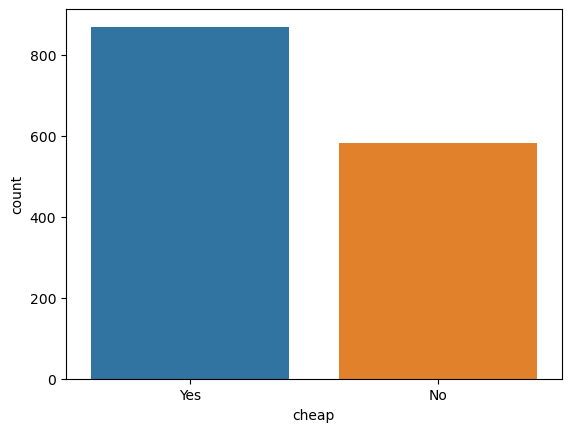

In [36]:
sns.countplot(x = 'cheap', data =df)

<AxesSubplot:xlabel='tasty', ylabel='count'>

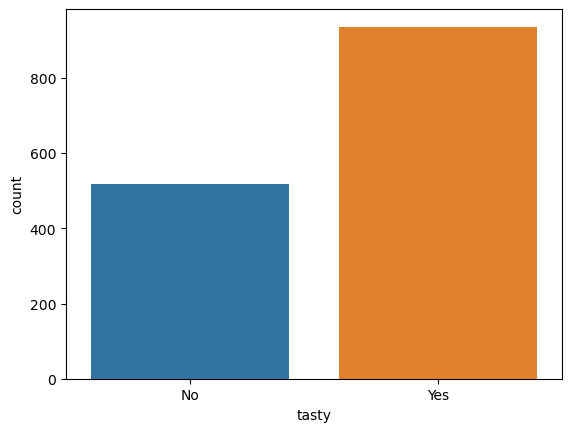

In [37]:
sns.countplot(x = 'tasty', data =df)

<AxesSubplot:xlabel='expensive', ylabel='count'>

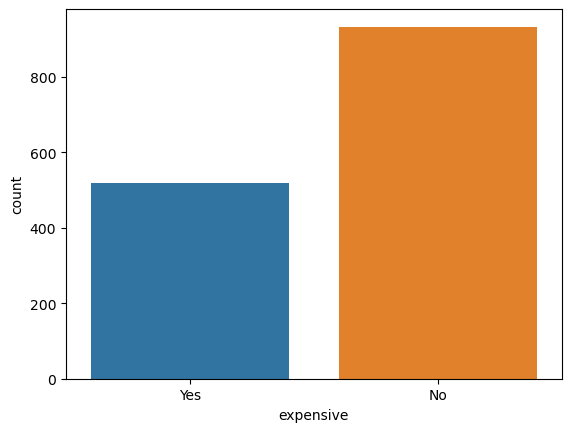

In [38]:
sns.countplot(x = 'expensive', data =df)

<AxesSubplot:xlabel='healthy', ylabel='count'>

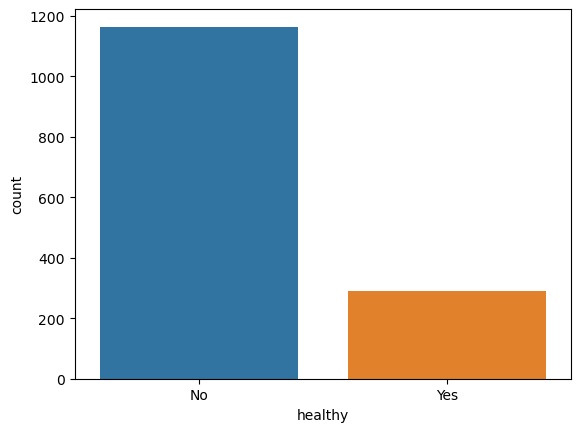

In [39]:
sns.countplot(x = 'healthy', data =df)

<AxesSubplot:xlabel='disgusting', ylabel='count'>

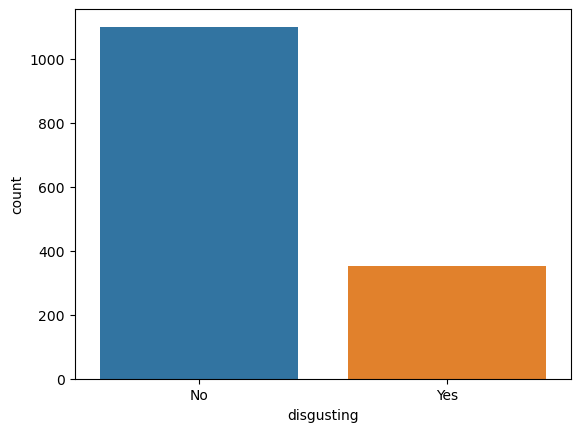

In [40]:
sns.countplot(x = 'disgusting', data =df)

We can now assign numeric values: 1 and 0 to our categorical variables:

In [41]:
mapping = {'Yes':1, 'No':0}

In [42]:
df['yummy'] = df['yummy'].map(mapping)
df['convenient'] = df['convenient'].map(mapping)
df['spicy'] = df['spicy'].map(mapping)
df['fattening'] = df['fattening'].map(mapping)
df['greasy'] = df['greasy'].map(mapping)
df['fast'] = df['fast'].map(mapping)
df['cheap'] = df['cheap'].map(mapping)
df['tasty'] = df['tasty'].map(mapping)
df['expensive'] = df['expensive'].map(mapping)
df['healthy'] = df['healthy'].map(mapping)
df['disgusting'] = df['disgusting'].map(mapping)

In [43]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


We will be performing a PCA to see which variables explain the variation in the data

In [44]:
pca = PCA(n_components=11)

In [45]:
x_pca = pca.fit(df)

In [46]:
x_pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

Note that the first two components explain about 50% variation in the data

We can also generate the loading scores of each component:

In [47]:
loadings = pd.DataFrame(x_pca.components_.T, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11'])

In [48]:
loadings 
# loading scores

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
1,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
2,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
3,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
4,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
5,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
6,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
7,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
8,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
9,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


Having completed the initial exploratory data analysis, we can now move onto clustering:

# CLUSTERING

We will begin by determining the optimal number of clusters using a dendogram:

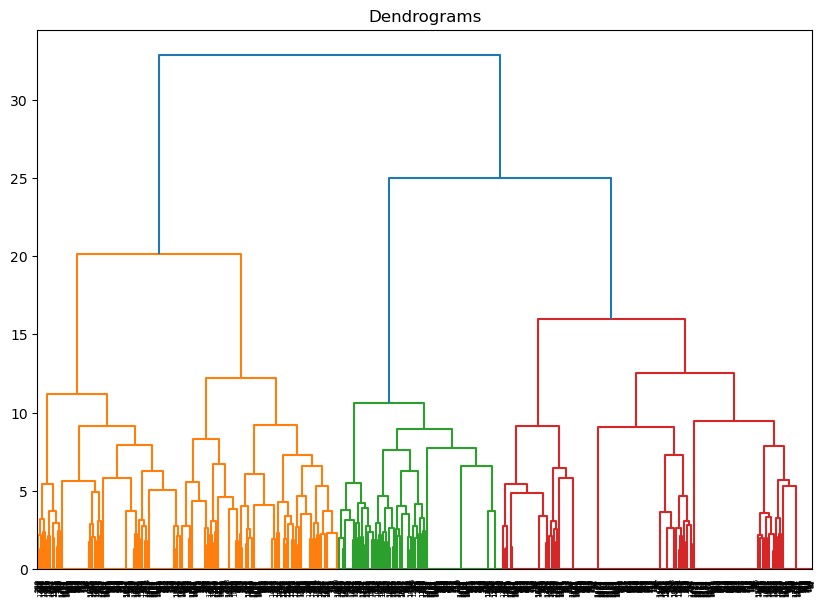

In [50]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

Therefore the number of optimal clusters = Number of colors in the dendograph - 1 = 4 - 1 = 3

# CLUSTERING

In [51]:
#Initialize our model
kmeans = KMeans(n_clusters=3)

In [52]:
#Fit our model
kmeans.fit(df)

C:\Users\Faayez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [53]:
clusters = kmeans.predict(df)

In [54]:
df['clusters'] = clusters

In [55]:
df['clusters']

0       2
1       1
2       1
3       0
4       2
       ..
1448    2
1449    0
1450    1
1451    0
1452    2
Name: clusters, Length: 1453, dtype: int32

Since there are more than two variables in the data we will have two use a PCA technique to be able to plot the clusters on to a 2D graph

In [56]:
#PCA with two principal components
pca_2d = PCA(n_components=2)

In [57]:
# This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(df.drop(["clusters"], axis=1)))

In [58]:
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

In [59]:
df = pd.concat([df,PCs_2d], axis=1, join='inner')

In [60]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,clusters,PC1_2d,PC2_2d
0,0,1,0,1,0,1,1,0,1,0,0,2,0.425367,-0.219079
1,1,1,0,1,1,1,1,1,1,0,0,1,-0.218638,0.388190
2,0,1,1,1,1,1,0,1,1,1,0,1,0.375415,0.730435
3,1,1,0,1,1,1,1,1,0,0,1,0,-0.172926,-0.352752
4,0,1,0,1,1,1,1,0,0,1,0,2,0.187057,-0.807610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,2,1.550242,0.275031
1449,1,1,0,1,0,0,1,1,0,1,0,0,-0.957339,0.014308
1450,1,1,0,1,0,1,0,1,1,0,0,1,-0.185894,1.062662
1451,1,1,0,0,0,1,1,1,0,1,0,0,-1.182064,-0.038570


In [61]:
cluster0 = df[df["clusters"] == 0]
cluster1 = df[df["clusters"] == 1]
cluster2 = df[df["clusters"] == 2]

In [62]:
#T-Distributed Stochastic Neighbor Embedding
from sklearn.manifold import TSNE 
#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [63]:
init_notebook_mode(connected=True)

In [64]:
#Building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)
#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)


data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)